In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.metrics import *
from itertools import product
import seaborn as sns
import statsmodels.api as sm
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle

warnings.filterwarnings('ignore')

C:\Users\Bruna\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
series = pd.read_csv('data.csv', sep=',', parse_dates=True, infer_datetime_format = True)
series.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1878 entries, 0 to 1877
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     1878 non-null   object 
 1   item_number             1878 non-null   int64  
 2   item_name               1878 non-null   object 
 3   purchase_price          1878 non-null   float64
 4   suggested_retail_price  1878 non-null   float64
 5   orders_quantity         1878 non-null   float64
 6   sales_quantity          1878 non-null   float64
 7   revenue                 926 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 117.5+ KB


In [4]:
series.isnull().sum()

day                         0
item_number                 0
item_name                   0
purchase_price              0
suggested_retail_price      0
orders_quantity             0
sales_quantity              0
revenue                   952
dtype: int64

In [5]:
series.head()

,day,item_number,item_name,purchase_price,suggested_retail_price,orders_quantity,sales_quantity,revenue
0,2022-02-09,80317483,ROMA TOMATEN ES I 500G SF,0.92,1.49,0.0,16.0,23.55
1,2022-02-09,80317483,ROMA TOMATEN ES I 500G SF,0.92,1.49,0.0,16.0,23.55
2,2022-02-09,80101923,SL MANDARINEN BEH.ES I 750G GS,2.05,3.49,0.0,3.0,10.47
3,2022-02-09,80101923,SL MANDARINEN BEH.ES I 750G GS,2.05,3.49,0.0,3.0,10.47
4,2022-02-09,80028349,UH ZWIEBELN DE-HE I 1KG GS,0.64,0.99,0.0,13.0,12.84


In [6]:
series['day'] = pd.to_datetime(series['day'])

series.groupby(['item_number', 'item_name']).size()

item_number  item_name                     
80028349     UH ZWIEBELN DE-HE I 1KG GS        626
80101923     SL MANDARINEN BEH.ES I 750G GS    626
80317483     ROMA TOMATEN ES I 500G SF         626
dtype: int64

In [19]:
series_all_products = pd.DataFrame(series.groupby(['day']).sum()['sales_quantity'])


In [8]:
# 80028349     UH ZWIEBELN DE-HE I 1KG GS        626
# 80101923     SL MANDARINEN BEH.ES I 750G GS    626
# 80317483     ROMA TOMATEN ES I 500G SF         626

series_uh = series[series['item_number']==80028349]
series_sl = series[series['item_number']==80101923]
series_roma = series[series['item_number']==80317483]

## Sales quantity is what i need to know for tomorrow, since i know how much my sales demand will be, i can avoid food waste buying more products than necessary

In [9]:
series_uh = pd.DataFrame(series_uh.groupby(['day']).sum()['sales_quantity'])
series_sl = pd.DataFrame(series_sl.groupby(['day']).sum()['sales_quantity'])
series_roma = pd.DataFrame(series_roma.groupby(['day']).sum()['sales_quantity'])

In [10]:
# series['day'] = pd.to_datetime(series['day'])
# series.set_index('day', inplace=True)

# Analysing sales quantity - the target of the model

### all products

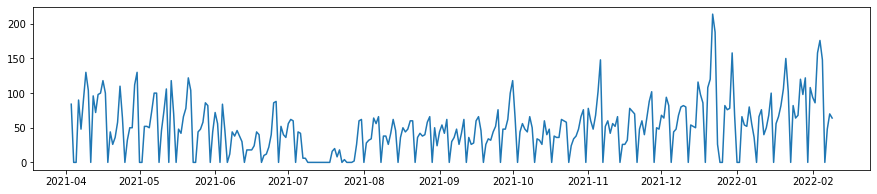

In [11]:
plt.figure(figsize=(15, 3))

plt.plot(series_test.sales_quantity)

plt.show()


### each one separately

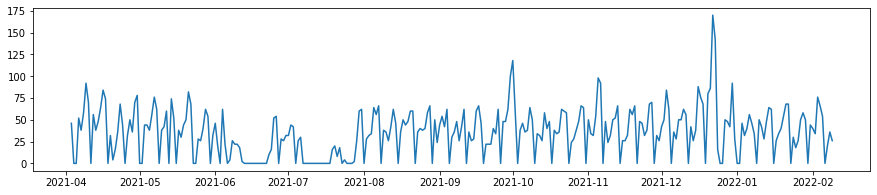

In [12]:
plt.figure(figsize=(15, 3))

plt.plot(series_uh.sales_quantity)

plt.show()


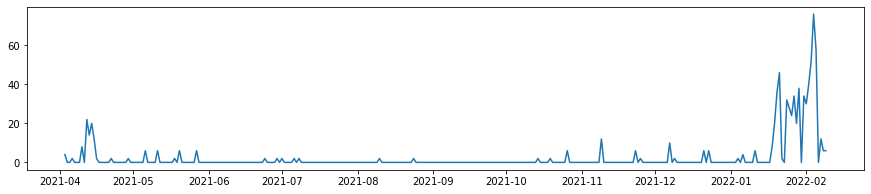

In [13]:
plt.figure(figsize=(15, 3))

plt.plot(series_sl.sales_quantity)

plt.show()

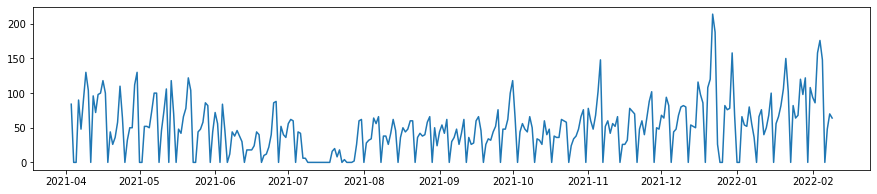

In [14]:
plt.figure(figsize=(15, 3))

plt.plot(series_test.sales_quantity)

plt.show()

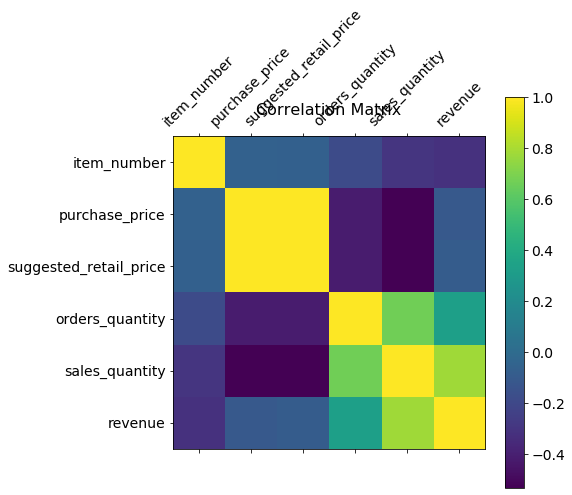

In [15]:
f = plt.figure(figsize=(7, 7))
plt.matshow(series.corr(), fignum=f.number)
plt.xticks(range(series.select_dtypes(['number']).shape[1]), series.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(series.select_dtypes(['number']).shape[1]), series.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

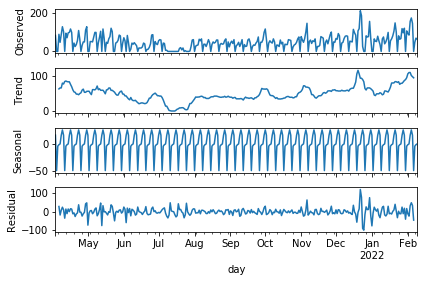

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

result = seasonal_decompose(series_all_products.sales_quantity, model='additive')
result.plot()
pyplot.show()

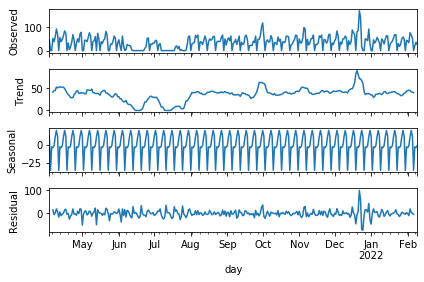

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

result = seasonal_decompose(series_uh.sales_quantity, model='additive')
result.plot()
pyplot.show()

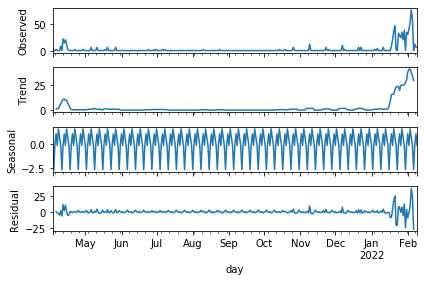

In [17]:
result = seasonal_decompose(series_sl.sales_quantity, model='additive')
result.plot()
pyplot.show()

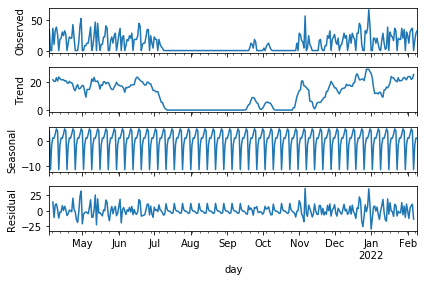

In [18]:
result = seasonal_decompose(series_roma.sales_quantity, model='additive')
result.plot()
pyplot.show()

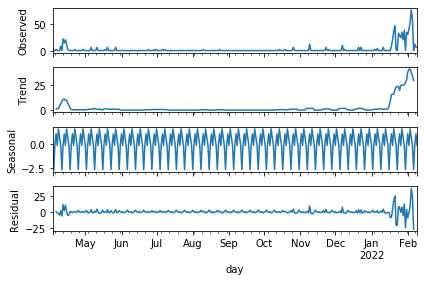

In [21]:
result = seasonal_decompose(series_sl.sales_quantity, model='additive')
result.plot()
pyplot.show()

## I decided to predict all products together for sake of latent data at this moement for an MVP, further I would look better for the correlated features and another possibilities of exogenous features and transformations on the series like simple mean, etc


In [22]:
series_all_products = series_all_products.reset_index()
series_all_products = series_all_products.astype(str)

In [56]:
x = series_all_products[series_all_products.day < '2022-01-25']

y = series_all_products[series_all_products.day >= '2022-01-25']

x['day'] = pd.to_datetime(x['day'])
y['day'] = pd.to_datetime(y['day'])


x.set_index('day', inplace=True)
y.set_index('day', inplace=True)

x['sales_quantity'] = x['sales_quantity'].apply(float)
y['sales_quantity'] = y['sales_quantity'].apply(float)

In [83]:
arima = sm.tsa.statespace.SARIMAX(x.values,order=(5, 1, 3)).fit()

In [84]:
pred = pd.DataFrame(arima.forecast(steps=y.shape[0])[0:])

In [85]:
mae_test_arima  = mean_absolute_error(y, pred)
mse_arima_test = mean_squared_error(y, pred)
rmse_arima_test = np.sqrt(mean_squared_error(y, pred))
r2_arima_test = r2_score(y, pred)

In [86]:
mae_test_arima

33.962481017685334

In [87]:
mse_arima_test

1580.5612310878912

In [88]:
rmse_arima_test

39.756272852065635

In [89]:
r2_arima_test

0.3329558003427342